# Doc2Vec to readme (315 repositories / train set)

## 1. Downloading the train set

In [1]:
!pip3 install gdown
!gdown 13Z-ReDj4QcwlfvIgUlL6MNE5W2dcPmLr


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Downloading...
From (uriginal): https://drive.google.com/uc?id=13Z-ReDj4QcwlfvIgUlL6MNE5W2dcPmLr
From (redirected): https://drive.google.com/uc?id=13Z-ReDj4QcwlfvIgUlL6MNE5W2dcPmLr&confirm=t&uuid=d733a697-84b3-4deb-a54c-082d1ab3c25a
To: /Users/Henry/Documents/PyCharmProjects/RepoSim4Py/Doc2vec/Doc2vec_readme_train_315/repo_info_train.pkl
100%|████████████████████████████████████████| 202M/202M [00:17<00:00, 11.8MB/s]


In [2]:
import pickle

with open("repo_info_train.pkl", "rb") as f:
    repo_info_train = pickle.load(f)
    f.close()

In [3]:
next(iter(repo_info_train.keys()))

'jet-admin/jet-bridge'

In [4]:
type(repo_info_train[next(iter(repo_info_train.keys()))]["readme"]) # list

list

In [5]:
repo_info_train[next(iter(repo_info_train.keys()))]["readme"]

['# [Jet Bridge](https://app.jetadmin.io/demo) &nbsp; [![Tweet](https://img.shields.io/twitter/url/http/shields.io.svg?style=social)](https://twitter.com/intent/tweet?text=Language%20agnostic%20Bridge%20for%20Jet%20%E2%80%93%20Back%20office%20totally%20ready%20to%20run%20your%20service&url=https://github.com/jet-admin/jet-bridge/&via=Jet_Admin&hashtags=admin,interface,backoffice,developers,jetadmin)\n\nfor Jet Admin – Admin panel framework for your application \n\n![Preview](https://raw.githubusercontent.com/jet-admin/jet-bridge/master/static/overview.gif)\n\nDescription\n===========\n\n* About Jet Admin: https://www.jetadmin.io\n* **Live Demo**: https://app.jetadmin.io/demo\n* Documentation: https://docs.jetadmin.io/\n* Support: support@jetadmin.io\n\n**Jet Admin** is a SaaS service that automatically generates extendable back office for your application. <br />\n**Jet Bridge** is a standalone app which generates REST API through which your SQL database is connected to **Jet Admin**. 

In [6]:
" ".join(repo_info_train[next(iter(repo_info_train.keys()))]["readme"])

'# [Jet Bridge](https://app.jetadmin.io/demo) &nbsp; [![Tweet](https://img.shields.io/twitter/url/http/shields.io.svg?style=social)](https://twitter.com/intent/tweet?text=Language%20agnostic%20Bridge%20for%20Jet%20%E2%80%93%20Back%20office%20totally%20ready%20to%20run%20your%20service&url=https://github.com/jet-admin/jet-bridge/&via=Jet_Admin&hashtags=admin,interface,backoffice,developers,jetadmin)\n\nfor Jet Admin – Admin panel framework for your application \n\n![Preview](https://raw.githubusercontent.com/jet-admin/jet-bridge/master/static/overview.gif)\n\nDescription\n===========\n\n* About Jet Admin: https://www.jetadmin.io\n* **Live Demo**: https://app.jetadmin.io/demo\n* Documentation: https://docs.jetadmin.io/\n* Support: support@jetadmin.io\n\n**Jet Admin** is a SaaS service that automatically generates extendable back office for your application. <br />\n**Jet Bridge** is a standalone app which generates REST API through which your SQL database is connected to **Jet Admin**. <

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels = [repo_info_train[repo_name]["topic"] for repo_name in list(repo_info_train.keys())]
encoded_labels = label_encoder.fit_transform(labels)

# Print the encoded labels
print(encoded_labels)

[  1  64  32  25  52  18  41  95  72  10  24 103  60 106  15  50  13  75
  29  44  82 112  36  39  49  83  58  58 118  43  63  66   2  93 109  48
  29  70  78   4  67  43  28  87 117 104  91  64  72  52  55  29  91   2
  90  64  83  41  72 109  74  56  96  16 109  17  29 117 112  67  77  14
  54  10   9  72  82  97  76  46  31  43  99  21 118  98   7  96  62  74
  79  57 105  83  30  49   7  75  60  44  13  59  98  86  52 116  52  29
  37 111 110  26  15 115  31  49  31  92 113   6  72 116  66  83   3  69
  21 111  42  22  81  51  69  47  16  22 109  27  51  68 115   2  93 117
  64  70  91  84  49  76  13 109  91   0  11  47  56  98  31  34   6  37
  40  40  70  47  58  53 117  68  63   1  44 118  52 101  44  58  43  80
   9 108  91 118  66  24  71  91  91  97 110  22  87  38  13  45   9  82
  86  47  47 114  26 116 117  19 113  41 107 115  43  47  94  27  48  56
  12  33  25  49  37  45  96  25  41  32  56   8  19 104  62 100 104   6
  76  56  72  97 119   6  11  23  27  52  25  74  4

## 2. Processing data and building corpus

In [8]:
!pip3 install gensim


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [15]:
corpus = []
for repo_name, repo_dict in repo_info_train.items():
    readme_str = " ".join(str(repo_info_train[repo_name]["readme"]))
    corpus.append(readme_str)

In [16]:
len(corpus)

315

In [17]:
file_path = "readme_train_corpus.txt"

with open(file_path, "w") as file:
    for sentence in corpus:
        file.write(sentence + "\n")

file.close()

## 3. Building doc2vec model

In [18]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [19]:
import gensim
import smart_open

def read_corpus(fname, tokens_only=False):
    with smart_open.open(fname, encoding="utf-8") as f:
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(str(tokens), [encoded_labels[i]])

train_corpus = list(read_corpus(file_path))

In [20]:
len(train_corpus)

315

In [21]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=10, min_count=2, epochs=100)

2023-07-06 22:33:18,428 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec<dm/m,d10,n5,w5,mc2,s0.001,t3>', 'datetime': '2023-07-06T22:33:18.428645', 'gensim': '4.3.1', 'python': '3.10.12 (main, Jun 20 2023, 19:43:52) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.4.1-arm64-arm-64bit', 'event': 'created'}


In [22]:
model.build_vocab(train_corpus)

2023-07-06 22:33:21,199 : INFO : collecting all words and their counts
2023-07-06 22:33:21,200 : WARNING : Each 'words' should be a list of words (usually unicode strings). First 'words' here is instead plain <class 'str'>.
2023-07-06 22:33:21,201 : INFO : PROGRESS: at example #0, processed 0 words (0 words/s), 0 word types, 0 tags
2023-07-06 22:33:21,202 : INFO : collected 2 word types and 120 unique tags from a corpus of 315 examples and 630 words
2023-07-06 22:33:21,203 : INFO : Creating a fresh vocabulary
2023-07-06 22:33:21,204 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=2 retains 2 unique words (100.00% of original 2, drops 0)', 'datetime': '2023-07-06T22:33:21.204063', 'gensim': '4.3.1', 'python': '3.10.12 (main, Jun 20 2023, 19:43:52) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.4.1-arm64-arm-64bit', 'event': 'prepare_vocab'}
2023-07-06 22:33:21,204 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 630 word corpus (100.00%

In [23]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

2023-07-06 22:33:22,934 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 2 vocabulary and 10 features, using sg=0 hs=0 sample=0.001 negative=5 window=5 shrink_windows=True', 'datetime': '2023-07-06T22:33:22.934001', 'gensim': '4.3.1', 'python': '3.10.12 (main, Jun 20 2023, 19:43:52) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.4.1-arm64-arm-64bit', 'event': 'train'}
2023-07-06 22:33:22,951 : INFO : EPOCH 0: training on 630 raw words (335 effective words) took 0.0s, 31300 effective words/s
2023-07-06 22:33:22,960 : INFO : EPOCH 1: training on 630 raw words (344 effective words) took 0.0s, 47586 effective words/s
2023-07-06 22:33:22,968 : INFO : EPOCH 2: training on 630 raw words (348 effective words) took 0.0s, 1907717 effective words/s
2023-07-06 22:33:22,976 : INFO : EPOCH 3: training on 630 raw words (341 effective words) took 0.0s, 15500005 effective words/s
2023-07-06 22:33:22,983 : INFO : EPOCH 4: training on 630 raw words (350 effective 

2023-07-06 22:33:23,218 : INFO : EPOCH 62: training on 630 raw words (347 effective words) took 0.0s, 130834 effective words/s
2023-07-06 22:33:23,221 : INFO : EPOCH 63: training on 630 raw words (347 effective words) took 0.0s, 121671 effective words/s
2023-07-06 22:33:23,225 : INFO : EPOCH 64: training on 630 raw words (341 effective words) took 0.0s, 133303 effective words/s
2023-07-06 22:33:23,229 : INFO : EPOCH 65: training on 630 raw words (346 effective words) took 0.0s, 118505 effective words/s
2023-07-06 22:33:23,232 : INFO : EPOCH 66: training on 630 raw words (346 effective words) took 0.0s, 154436 effective words/s
2023-07-06 22:33:23,236 : INFO : EPOCH 67: training on 630 raw words (345 effective words) took 0.0s, 23455046 effective words/s
2023-07-06 22:33:23,240 : INFO : EPOCH 68: training on 630 raw words (351 effective words) took 0.0s, 23663453 effective words/s
2023-07-06 22:33:23,244 : INFO : EPOCH 69: training on 630 raw words (344 effective words) took 0.0s, 13791

In [25]:
vector = model.infer_vector(repo_info_train[next(iter(repo_info_train.keys()))]["readme"])
vector.shape

(10,)

## 4. Similarity calculation

In [26]:
import torch
from tqdm import tqdm
from torch.nn import CosineSimilarity
from itertools import combinations
import pandas as pd

cossim = CosineSimilarity(dim=0, eps=1e-8)
res = []
num_of_repos = len(repo_info_train)
num_of_rows = num_of_repos * (num_of_repos - 1) // 2

for repo1, repo2 in tqdm(combinations(repo_info_train.keys(), 2), total=num_of_rows):
    row = [repo1, repo2, repo_info_train[repo1]["topic"], repo_info_train[repo2]["topic"]]
    embedding1 = torch.tensor(model.infer_vector(repo_info_train[repo1]["readme"]))
    embedding2 = torch.tensor(model.infer_vector(repo_info_train[repo2]["readme"]))
    similarity = cossim(embedding1, embedding2).cpu().detach().numpy().item()
    row.append(similarity)

    res.append(row)

df = pd.DataFrame(res, columns=["repo1", "repo2", "topic1", "topic2", "doc2vec_readme"])
df

100%|████████████████████████████████████| 49455/49455 [01:10<00:00, 702.10it/s]


,repo1,repo2,topic1,topic2,doc2vec_readme
0,jet-admin/jet-bridge,patrys/httmock,Admin Panels,Mock,0.469471
1,jet-admin/jet-bridge,pytransitions/transitions,Admin Panels,Design Patterns,-0.191888
2,jet-admin/jet-bridge,keleshev/schema,Admin Panels,Data Validation,-0.525671
3,jet-admin/jet-bridge,dylanaraps/pywal,Admin Panels,Image Processing,0.083803
4,jet-admin/jet-bridge,PyCQA/modernize,Admin Panels,Compatibility,0.271993
...,...,...,...,...,...
49450,thauber/django-schedule,Miserlou/Zappa,Job Scheduler,Serverless Frameworks,-0.183581
49451,thauber/django-schedule,jek/blinker,Job Scheduler,Miscellaneous,-0.019539
49452,Yelp/mrjob,Miserlou/Zappa,Batch Processing,Serverless Frameworks,-0.005348
49453,Yelp/mrjob,jek/blinker,Batch Processing,Miscellaneous,-0.082787


In [27]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,repo1,repo2,topic1,topic2,doc2vec_readme
0,jet-admin/jet-bridge,patrys/httmock,Admin Panels,Mock,0.469471
1,jet-admin/jet-bridge,pytransitions/transitions,Admin Panels,Design Patterns,-0.191888
2,jet-admin/jet-bridge,keleshev/schema,Admin Panels,Data Validation,-0.525671
3,jet-admin/jet-bridge,dylanaraps/pywal,Admin Panels,Image Processing,0.083803
4,jet-admin/jet-bridge,PyCQA/modernize,Admin Panels,Compatibility,0.271993
...,...,...,...,...,...
49450,thauber/django-schedule,Miserlou/Zappa,Job Scheduler,Serverless Frameworks,-0.183581
49451,thauber/django-schedule,jek/blinker,Job Scheduler,Miscellaneous,-0.019539
49452,Yelp/mrjob,Miserlou/Zappa,Batch Processing,Serverless Frameworks,-0.005348
49453,Yelp/mrjob,jek/blinker,Batch Processing,Miscellaneous,-0.082787


In [28]:
df.sort_values("doc2vec_readme", ascending=False).reset_index(drop=True)

,repo1,repo2,topic1,topic2,doc2vec_readme
0,kootenpv/yagmail,getpelican/pelican,Mail Clients,Static Site Generator,0.933365
1,dask/dask,jfkirk/tensorrec,Batch Processing,Recommender Systems,0.933235
2,stephenmcd/mezzanine,awesto/django-shop,CMS,E-commerce,0.930989
3,mindflayer/python-mocket,PySimpleGUI/PySimpleGUI,Mock,GUI Development,0.918433
4,gmr/queries,Parsely/streamparse,PostgreSQL,Stream Processing,0.909956
...,...,...,...,...,...
49450,dask/dask,hhatto/nude.py,Batch Processing,Image Processing,-0.924046
49451,benfred/py-spy,devsnd/tinytag,Profiler,Metadata,-0.926944
49452,zachwill/moment,aizvorski/scikit-video,Date and Time,Video,-0.938882
49453,patrys/httmock,pypa/bandersnatch,Mock,Package Repositories,-0.940246


In [29]:
df.to_csv("readme_doc2vec_evaluation_train_315.csv")

## 5. Evaluation

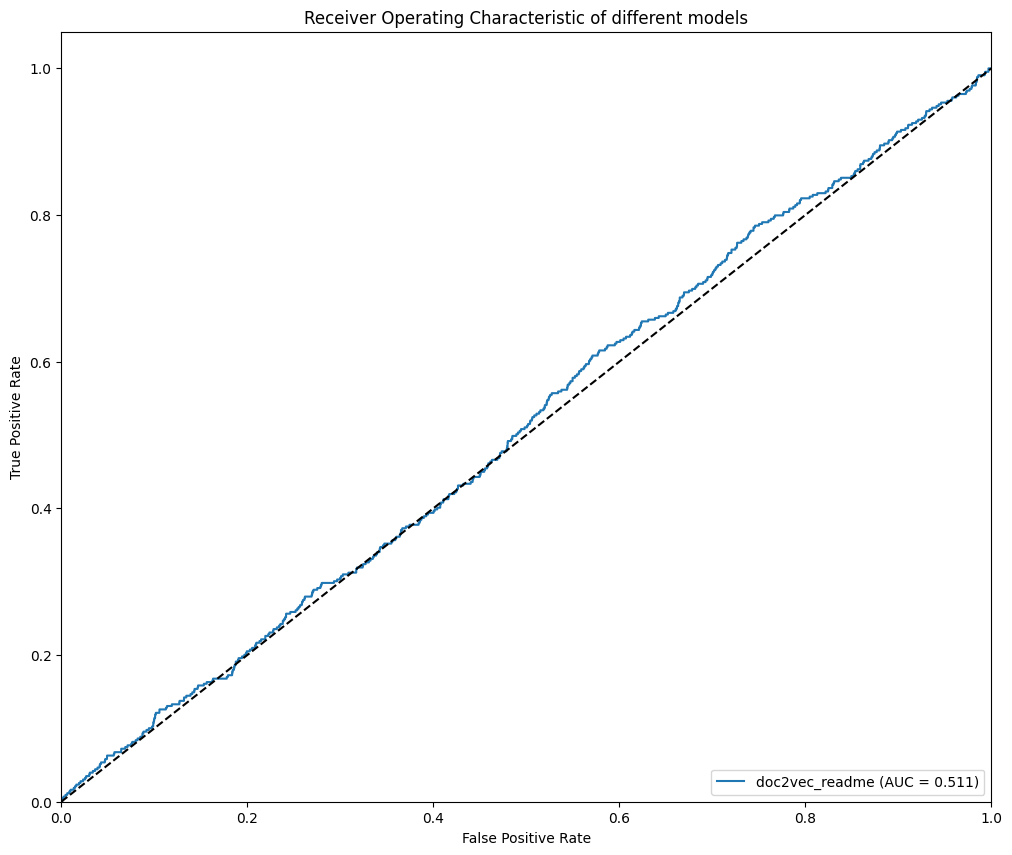

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model_auc = {}
y_true = df['topic1'] == df['topic2']
fig = plt.figure(figsize=(12, 10))

model_names = ["doc2vec_readme"]

def roc(model_name):
    y_score = df[model_name]
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    model_auc[model_name] = roc_auc

    plt.plot(fpr, tpr, label=model_name)


for model_name in model_names:
    roc(model_name)

# Order labels by each model's auc score
handles, labels = plt.gca().get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda k: -model_auc[labels[k]])
ordered_handles = [handles[idx] for idx in order]
ordered_labels = [f'{labels[idx]} (AUC = {model_auc[labels[idx]]:.3f})' for idx in order]
plt.legend(ordered_handles, ordered_labels, loc="lower right")

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic of different models')
plt.savefig('roc_doc2vec_readme_evaluation_train_315.png')
plt.show()

In [31]:
model_auc

{'doc2vec_readme': 0.5110855264753197}